## Discriminating cryo-EM particles in images
👋 Welcome to my cryo-EM project! This Python-based toolkit is designed to facilitate the reconstruction process in cryo-electron microscopy (cryo-EM), and is comprised of three main functions:

* Step 1: Clustering of data (images)
* Step 2: Particle Picking
* Step 3: 2D Classification

*To do*
* *Organise the EM_images Script: Break down the script into functions within a class for readability and modularity.*
* *Expand Functionality: Implement a comparison with manually selected particles, clustering, and visualisation.*
* *Test and Iterate: Test each component with a subset of images, then iterate based on the results to refine approach. Build Unit and Integration tests as appropriate. Add error codes, init etc*
* *Generate dependencies list file* Write in readme we use numpy etc

Firstly, we import the **cryo_em** class which is found in our **cryo_em_toolkit**. We print the class name to confirm the class has been successfully imported into the Jupyter Notebook, and is accessible for further use in this notebook.

In [6]:
from cryo_em_toolkit import cryo_em
print(cryo_em)

<class 'cryo_em_toolkit.cryo_em'>


We can now create instances of our **cryo_em** class and call its methods as needed. Let's begin by importing a selecton of image files, and determining if  images are visually similar enough to known particles to be classified as particles themselves. This is particularly useful for cryo-EM analysis, as visuals can be quite noisy and make it difficult to determine what is and isn't a particle at scale: this will serve as our basic particle picker functionality. 

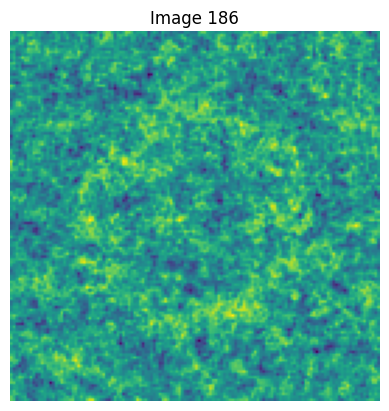

Mean similarity: 0.06036275050309272
This image is similar to the reference images: True


In [8]:
from cryo_em_toolkit import cryo_em
import matplotlib.pyplot as plt

# Create an instance of the cryo_em class
my_cryo_em = cryo_em()

# Load images
filepath = './project_em_particle/all_images.npz'
images = my_cryo_em.load_images(filepath)

# Example parameters, adjust treshold as required and select different images
reference_images = images[:5]
threshold = 0.05
image_index = 186

# Display the image in question
plt.imshow(images[image_index])
plt.title(f"Image {image_index}")
plt.axis('off')
plt.show()

# Comparing the specific image to the reference images
result = my_cryo_em.compare_with_reference(images[image_index], reference_images, threshold)
print("This image is similar to the reference images:", result)


### Visualisation: Example Adaptation for Cryo-EM

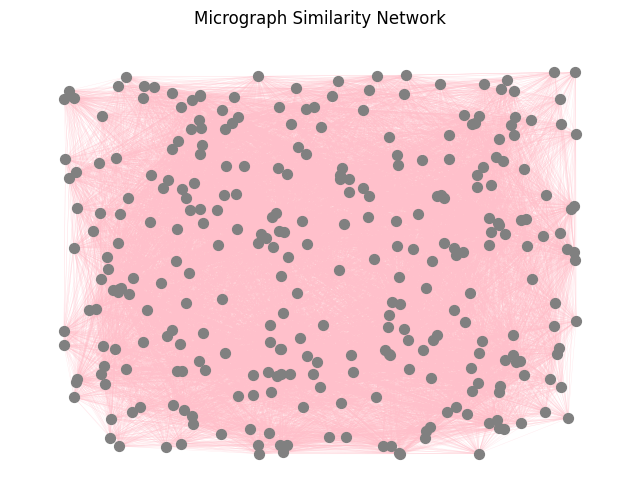

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load images from .npz file
def load_images(filepath):
    data = np.load(filepath)
    images = data['arr_0']
    return images

# Visualisation customisation
options = {
    "node_size": 50, 
    "node_color": "grey",
    "edge_color": "pink",
    "font_color": "blue",
    "width": 0.25,  
}

# File path
filepath = './project_em_particle/all_images.npz'
images = load_images(filepath)

# Use image data to determine network, number of nodes = number of loaded images
num_micrographs = len(images) 
similarity_threshold = 0.5 

G = nx.random_geometric_graph(num_micrographs, similarity_threshold, seed=42)

# Assign positions
pos = nx.get_node_attributes(G, "pos")
if not pos: 
    pos = {i: (np.random.uniform(), np.random.uniform()) for i in range(num_micrographs)}

# Visualize network
fig, ax = plt.subplots(figsize=(8, 6))
# Apply edge color and width
nx.draw_networkx_edges(G, pos, alpha=0.4, width=options['width'], edge_color=options['edge_color'], ax=ax)
# Apply node color and size
nx.draw_networkx_nodes(G, pos, node_size=options['node_size'], node_color=options['node_color'], ax=ax)
# nx.draw_networkx_labels(G, pos, font_color=options['font_color'], ax=ax)

ax.axis("off")
plt.title("Micrograph Similarity Network")
plt.show()


In [ ]:
# Number